Looking at economic metrics from 1980 onwards. All data comes from [St. Louis Fed](https://fred.stlouisfed.org).

In [5]:
import pandas as pd

unrate = pd.read_csv('UNRATE.csv', parse_dates=['DATE']) \
  .query('DATE >= 1981')
debt = pd.read_csv('GFDEGDQ188S.csv', parse_dates=['DATE'], na_values='.') \
  .query('DATE >= 1981')
sticky_cpi = pd.read_csv('CORESTICKM159SFRBATL.csv', parse_dates=['DATE'], na_values='.') \
  .query('DATE >= 1981')

Here is some information on presidents.

In [2]:
REPUBLICAN = 'red'
DEMOCRAT = 'blue'

presidents = [
  (1981, 1989, REPUBLICAN, 'Ronald Reagan'),
  (1989, 1993, REPUBLICAN, 'George H. W. Bush'),
  (1993, 2001, DEMOCRAT, 'Bill Clinton'),
  (2001, 2009, REPUBLICAN, 'George W. Bush'),
  (2009, 2017, DEMOCRAT, 'Barack Obama'),
  (2017, 2021, REPUBLICAN, 'Donald Trump'),
  (2021, 2022, DEMOCRAT, 'Joe Biden')
]

Text(0, 0.5, 'Sticky Price CPI\nLess Food and Energy')

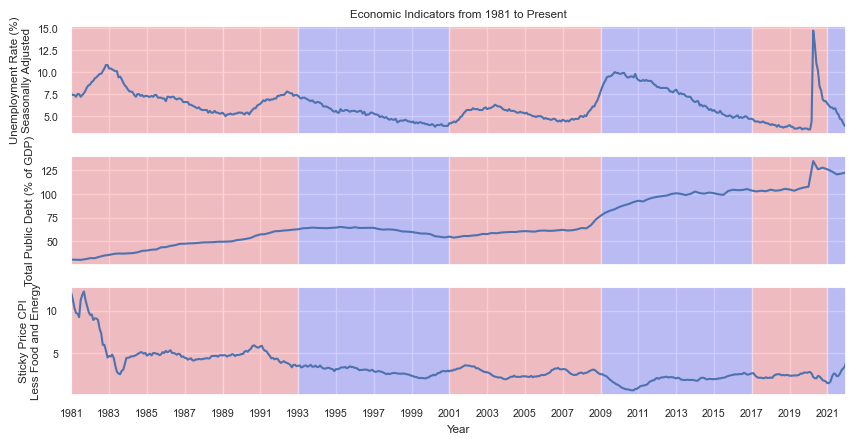

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme(style='whitegrid')
sns.set(font_scale=0.7)

fig, ax = plt.subplots(3, 1, sharex=True)
fig.set_figwidth(10)
ax[-1].set_xlabel('Year')
ax[-1].set_xlim(pd.to_datetime('1981'), pd.to_datetime('2022'))
ax[-1].set_xticks([pd.to_datetime(str(year)) for year in range(1981, 2023, 2)])

ax[0].set_title("Economic Indicators from 1981 to Present")

for start, end, party, _ in presidents:
  for axis in ax:
    axis.axvspan(pd.to_datetime(str(start)), pd.to_datetime(str(end)),
      facecolor=party, alpha=0.2)

sns.lineplot(unrate, x='DATE', y='UNRATE', ax=ax[0])
ax[0].set_ylabel('Unemployment Rate (%)\nSeasonally Adjusted')

sns.lineplot(debt, x='DATE', y='GFDEGDQ188S', ax=ax[1])
ax[1].set_ylabel('Total Public Debt\n(% of GDP)')

sns.lineplot(sticky_cpi, x='DATE', y='CORESTICKM159SFRBATL', ax=ax[2])
ax[2].set_ylabel('Sticky Price CPI\nLess Food and Energy')